#Get data

In [12]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c hbku2019

100% 5.11G/5.13G [00:36<00:00, 179MB/s]
100% 5.13G/5.13G [00:36<00:00, 151MB/s]


In [14]:
!unzip hbku2019.zip 

Archive:  hbku2019.zip
  inflating: Cocos_Baseline.ipynb    
  inflating: Cocos_Baseline_v1.ipynb  
  inflating: imgs.zip                
  inflating: labels.zip              


In [15]:
!unzip imgs.zip
!unzip labels.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/000000039650.jpg  
  inflating: imgs/train/000000039673.jpg  
  inflating: imgs/train/000000034394.jpg  
  inflating: imgs/train/000000016580.jpg  
  inflating: imgs/train/000000038782.jpg  
  inflating: imgs/train/000000055664.jpg  
  inflating: imgs/train/000000073556.jpg  
  inflating: imgs/train/000000046338.jpg  
  inflating: imgs/train/000000018175.jpg  
  inflating: imgs/train/000000006540.jpg  
  inflating: imgs/train/000000037624.jpg  
  inflating: imgs/train/000000083168.jpg  
  inflating: imgs/train/000000072557.jpg  
  inflating: imgs/train/000000037659.jpg  
  inflating: imgs/train/000000034792.jpg  
  inflating: imgs/train/000000022068.jpg  
  inflating: imgs/train/000000012715.jpg  
  inflating: imgs/train/000000090594.jpg  
  inflating: imgs/train/000000115879.jpg  
  inflating: imgs/train/000000015620.jpg  
  inflating: imgs/train/000000109334.jpg  
  inflating: imgs/train/000000108834.jpg  
  i

#Dataset and Dataloader

In [16]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models

In [17]:
import pandas as pd
import numpy as np

classes = pd.read_csv('labels/categories.csv', header=None)
classes = list(classes[0])
classes, len(classes)

(['person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed',
  'dining table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',
  'hair dri

In [18]:
data = pd.read_csv('labels/labels_train.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,000000000001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000000000002.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000000000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000000000005.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000000000006.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97769,000000122212.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97770,000000122213.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97771,000000122214.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97772,000000122215.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from PIL import Image

class MultilabelDataset(Dataset):
  def __init__(self, csvpath, transform, train, trainpct):
    self.transform = transform
    self.data = pd.read_csv(csvpath).sample(frac=1)
    self.split = int(len(self.data) * trainpct)
    
    if train:
      self.imgpaths = np.asarray(self.data.iloc[:self.split, 0])
      self.labelsarr = np.asarray(self.data.iloc[:self.split, 1:]).astype(np.float32)
    else:
      self.imgpaths = np.asarray(self.data.iloc[self.split:, 0])
      self.labelsarr = np.asarray(self.data.iloc[self.split:, 1:]).astype(np.float32)

  def __getitem__(self, index):
      
    img = Image.open("imgs/train/" + self.imgpaths[index]).convert('RGB')
    if self.transform is not None:
      img = self.transform(img)

    labels = self.labelsarr[index]

    return (img, labels)

  def __len__(self):
    return len(self.imgpaths)

In [58]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [59]:
traindata = MultilabelDataset('labels/labels_train.csv', transform, True, 0.8)
valdata = MultilabelDataset('labels/labels_train.csv', transform, False, 0.8)

len(traindata), len(valdata)

(78218, 19555)

In [60]:
batchsize = 64
trainloader = DataLoader(traindata, batch_size=batchsize, shuffle=True, num_workers=2)
valloader = DataLoader(valdata, batch_size=batchsize, num_workers=2)

In [61]:
next(iter(trainloader))

[tensor([[[[-1.5528, -1.5357, -1.5185,  ..., -1.5699, -1.5699, -1.5699],
           [-1.5528, -1.5357, -1.5185,  ..., -1.5699, -1.5699, -1.5699],
           [-1.5528, -1.5357, -1.5185,  ..., -1.5699, -1.5699, -1.5699],
           ...,
           [-1.6555, -1.6384, -1.6213,  ..., -1.9467, -1.9467, -1.9467],
           [-1.6384, -1.6042, -1.6042,  ..., -1.9638, -1.9467, -1.9638],
           [-1.6384, -1.6042, -1.6042,  ..., -1.9809, -1.9638, -1.9467]],
 
          [[-1.4580, -1.4405, -1.4230,  ..., -1.4405, -1.4405, -1.4405],
           [-1.4580, -1.4405, -1.4230,  ..., -1.4405, -1.4405, -1.4405],
           [-1.4580, -1.4405, -1.4230,  ..., -1.4405, -1.4405, -1.4405],
           ...,
           [-1.4930, -1.4755, -1.4580,  ..., -1.8782, -1.8782, -1.8782],
           [-1.4755, -1.4405, -1.4405,  ..., -1.8957, -1.8782, -1.8957],
           [-1.4755, -1.4405, -1.4405,  ..., -1.9132, -1.8957, -1.8782]],
 
          [[-1.2293, -1.2119, -1.1944,  ..., -1.2293, -1.2293, -1.2293],
           [-

#Baseline model

In [62]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [63]:
gpu = 'cuda' if torch.cuda.is_available() else 'cpu'

In [64]:
weights = models.ResNeXt50_32X4D_Weights.DEFAULT
model = models.resnext50_32x4d(weights=weights).to(gpu)

summary(model, input_size=(64, 3, 256, 256), col_names=['trainable'])

Layer (type:depth-idx)                   Trainable
ResNet                                   True
├─Conv2d: 1-1                            True
├─BatchNorm2d: 1-2                       True
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        True
│    └─Bottleneck: 2-1                   True
│    │    └─Conv2d: 3-1                  True
│    │    └─BatchNorm2d: 3-2             True
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  True
│    │    └─BatchNorm2d: 3-5             True
│    │    └─ReLU: 3-6                    --
│    │    └─Conv2d: 3-7                  True
│    │    └─BatchNorm2d: 3-8             True
│    │    └─Sequential: 3-9              True
│    │    └─ReLU: 3-10                   --
│    └─Bottleneck: 2-2                   True
│    │    └─Conv2d: 3-11                 True
│    │    └─BatchNorm2d: 3-12            True
│    │    └─ReLU: 3-13                 

In [65]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [66]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for param in model.parameters():
  param.requires_grad = False

model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=len(classes), bias=True),
    nn.Sigmoid()
).to(gpu)

summary(model, input_size=(64, 3, 256, 256), col_names=['trainable'])

Layer (type:depth-idx)                   Trainable
ResNet                                   Partial
├─Conv2d: 1-1                            False
├─BatchNorm2d: 1-2                       False
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        False
│    └─Bottleneck: 2-1                   False
│    │    └─Conv2d: 3-1                  False
│    │    └─BatchNorm2d: 3-2             False
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  False
│    │    └─BatchNorm2d: 3-5             False
│    │    └─ReLU: 3-6                    --
│    │    └─Conv2d: 3-7                  False
│    │    └─BatchNorm2d: 3-8             False
│    │    └─Sequential: 3-9              False
│    │    └─ReLU: 3-10                   --
│    └─Bottleneck: 2-2                   False
│    │    └─Conv2d: 3-11                 False
│    │    └─BatchNorm2d: 3-12            False
│    │    └─ReLU: 3-13

In [67]:
lossfn = nn.BCELoss()
optim = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [68]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm

def trainloop(model, trainloader, lossfn, optim):
  model.train()

  for x, y in tqdm(trainloader):
    yprob = model(x.to(gpu))

    loss = lossfn(yprob, y.to(gpu))
    optim.zero_grad()
    loss.backward()
    optim.step()

  return loss

def testloop(model, testloader, lossfn):
  model.eval()

  with torch.inference_mode():
    for x, y in tqdm(testloader):
      yprob = model(x.to(gpu))
      loss = lossfn(yprob, y.to(gpu))

  return loss

In [69]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1

for epoch in tqdm(range(epochs)):
  trainloss = trainloop(model, trainloader, lossfn, optim)
  valloss = testloop(model, valloader, lossfn)

  print("Epoch:", epoch, "Train loss:", trainloss, "Val loss:", valloss)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1223 [00:00<?, ?it/s]

  0%|          | 0/306 [00:00<?, ?it/s]

Epoch: 0 Train loss: tensor(0.0873, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>) Val loss: tensor(0.0660, device='cuda:0')


In [70]:
torch.save(model.state_dict(), 'resnext.pth')

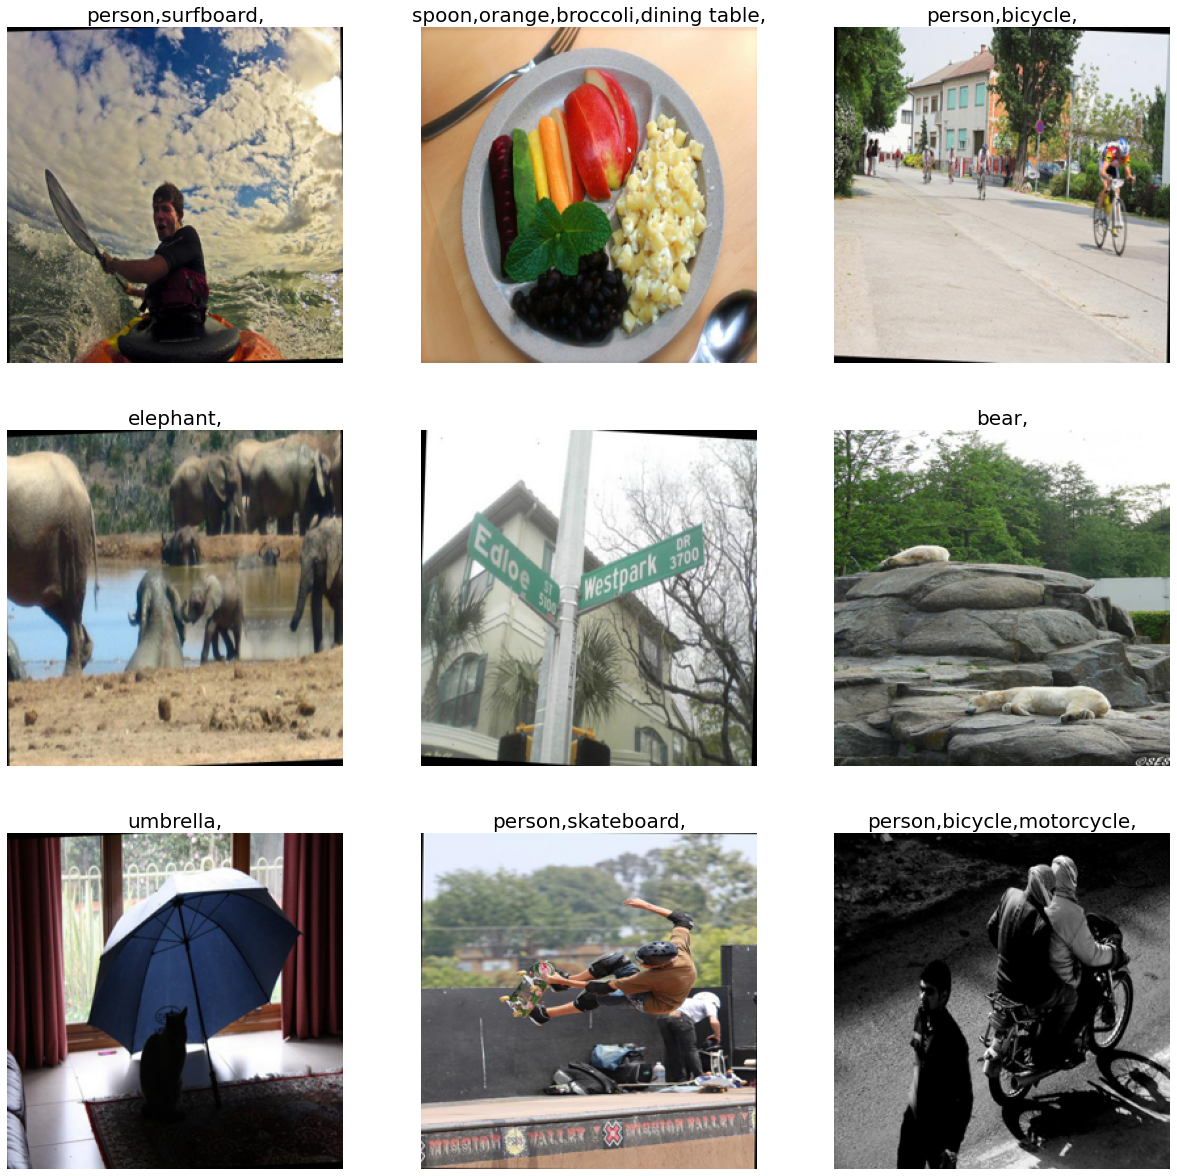

In [125]:
import os
import random
from matplotlib import pyplot as plt

imgs = random.sample(os.listdir('imgs/test/'), 9)

plt.figure(figsize=(21, 21))

for i in range(9):
  img = Image.open('imgs/test/' + imgs[i]).convert('RGB')
  newimg = transform(img).unsqueeze(dim=0)

  model.eval()
  with torch.inference_mode():
    yprob = model(newimg.to(gpu)).cpu()

  indices = np.where(yprob.squeeze(dim=0) > 0.5)

  plt.subplot(3, 3, i+1)
  plt.imshow(img.resize((256, 256)))
  plt.axis(False)
  
  objects = ''
  space = 0
  for idx in indices[0]:
    objects += classes[idx] + ','
    space += 1
    if space % 4 == 0:
      objects += '\n'
  
  plt.title(objects.rstrip(), fontsize=20)

#Test csv for submission

In [132]:
class CustomTestDataset(Dataset):
  def __init__(self, path, transform):
    self.transform = transform
    self.paths = sorted(os.listdir(path))
    self.image_arr = np.asarray(self.paths)
    self.data_len = len(self.image_arr)

  def __getitem__(self, index):
    single_image_name = self.image_arr[index]
    img = Image.open(self.path + single_image_name).convert('RGB')

    if self.transform is not None:
      img = self.transform(img)

    return (img, single_image_name)

  def __len__(self):
    return self.data_len

In [133]:
testdata = CustomTestDataset('imgs/test/', transform)
testloader = DataLoader(testdata, batch_size=1, shuffle=False, num_workers=2)

In [131]:
predictions = None

model.eval()
with torch.inference_mode():
  for x, _ in tqdm(testloader):
    yprob = model(x.to(gpu)).detach().cpu()
    outputs = np.around(yprob)
    try:
      predictions = np.concatenate((predictions,outputs))
    except:
      predictions = outputs

  0%|          | 0/24444 [00:00<?, ?it/s]

In [134]:
predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [135]:
outputs = []
for x in predictions:
    a = np.nonzero(x)[0]
    b = " ".join(map(str, a))
    outputs.append(b)

In [136]:
outputs

['0',
 '16',
 '68 69 71',
 '15 56 57 60 75',
 '26 71',
 '0',
 '0 40 56 60 62 71 75',
 '3',
 '15 71',
 '56 60 73 76',
 '20',
 '61 71 75',
 '45 56 57 60 68 69 71 72 75',
 '61 71',
 '0 26 27',
 '39 45 56 69 71',
 '0 39 68 71 76',
 '58 61 71 75',
 '0 39 41 43 44 45 50 60 71',
 '61 71',
 '71 79',
 '39 71',
 '0 39 40 41 43 44 45 58 60 68 69 71 72',
 '61 71 78',
 '26 45 68 71 72',
 '45 68 69 71 72',
 '45 47 68 69 71',
 '0 39 71',
 '28 56 57 60',
 '40 45 56 57 60 62 68 69 71 75',
 '0 27',
 '7 9',
 '1 3 56 60',
 '0 1 2 3 5 7 9 26',
 '25',
 '0 6',
 '1 13',
 '0 28 46',
 '2 9',
 '0 3',
 '0 27 60',
 '0',
 '3 46',
 '0 25 26',
 '0 1 5 26 28',
 '0 26 27',
 '0 59 61 71',
 '0 49',
 '0 40 44 45 68 69 71 72',
 '0 45 56 71',
 '69 71',
 '39 45 47 60 68 69 71 75',
 '74',
 '0',
 '0 27 76',
 '0 71',
 '2 7',
 '9',
 '0 2 5 9 67',
 '7',
 '0 3',
 '76',
 '0 76',
 '0 41 55 56 68 69 71',
 '0',
 '0 61 65',
 '0 39 45 71 76',
 '0 61',
 '0 27 67',
 '0 26 27 28 59 67 68 71',
 '0 61',
 '39 44 64 68 69 76',
 '44 45 51 60',


In [137]:
submission = pd.DataFrame({'id':testdata.paths, 'predictions':outputs})
submission.to_csv('/content/resnext_submission.csv', index=False)

In [138]:
pd.read_csv('resnext_submission.csv')

,id,predictions
0,000000000000.jpg,0
1,000000000003.jpg,16
2,000000000023.jpg,68 69 71
3,000000000031.jpg,15 56 57 60 75
4,000000000035.jpg,26 71
...,...,...
24439,000000122187.jpg,NaN
24440,000000122192.jpg,21
24441,000000122197.jpg,48 50
24442,000000122202.jpg,15 57
